<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Scenario-1" data-toc-modified-id="Scenario-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scenario 1</a></span><ul class="toc-item"><li><span><a href="#Solving-with-ICU" data-toc-modified-id="Solving-with-ICU-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Solving with ICU</a></span></li><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li><li><span><a href="#Scenario-2" data-toc-modified-id="Scenario-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scenario 2</a></span><ul class="toc-item"><li><span><a href="#Solving-with-ICU" data-toc-modified-id="Solving-with-ICU-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Solving with ICU</a></span></li><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li><li><span><a href="#Scenario-3" data-toc-modified-id="Scenario-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scenario 3</a></span><ul class="toc-item"><li><span><a href="#Solving-with-ICU" data-toc-modified-id="Solving-with-ICU-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Solving with ICU</a></span></li><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li></ul></div>

# Description

This notebook aims at testing the two main algorithms on larger graphs in order to test for the scalability of the approach

# Load

In [264]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from graph import expand_graph

import pandas as pd
import os

from graph import construct_graph

from graph import get_edge_list

from FW_icu import modified_FW

from FW_OuterUpdate import solve

from compare_outputs import compare_final
from helpers_icu import print_final_flows, print_final_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Scenario 1

In [265]:
path='Data/2Nodes/'

In [266]:
G_0, OD = construct_graph(path)

In [268]:
edge_list=get_edge_list(G_0)

## Solving with ICU

In [269]:
#How to compute a stopping criterion? 
G_icu,y_list,opt_res,OD_list=modified_FW(G_0.copy(),OD.copy(),edge_list,maxIter=400,
                         step='fixed',rebalancer_smoothing=True, ri_smoothing=False,evolving_bounds=False)

## Solving with Outer Loop

In [270]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0}
Cost at the beginning of the iteration:
('1', '2')  :  41.4
('1', 'R')  :  10000000000000000000000
('1', '2_p')  :  134.0
('1', '1_p')  :  154.0
('2', '1')  :  36.0
('2', 'R')  :  10000000000000000000000
('2', '1_p')  :  716.6666666666669
('2', '2_p')  :  154.0
Flows at the beginning of the iteration:
('1', '2')  :  10
('1', 'R')  :  0
('1', '2_p')  :  0
('1', '1_p')  :  0
('2', '1')  :  0
('2', 'R')  :  0
('2', '1_p')  :  10
('2', '2_p')  :  10
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': 5.6397357602358404, '1_p': 0, '2': -5.6397357602358404, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 5.6397357602358404}
Cost at the beginning of the iteration:
('1', '2')  :  41.4
('1', 'R')  :  41.4
('1', '2_p')  :  134.0
('1

In [271]:
from compare_outputs import compare_final
from helpers_icu import print_final_flows, print_final_cost

In [272]:
compare_final(G_icu,G_FW,'flow')

('1', '2')  :  0.01 %
('1', 'R')  :  0.24 %
('1', '2_p')  :  0.0 %
('1', '1_p')  :  0.01 %
('2', '1')  :  0.24 %
('2', 'R')  :  0.0 %
('2', '1_p')  :  0.01 %
('2', '2_p')  :  0.0 %


In [273]:
compare_final(G_icu,G_FW,'cost')

('1', '2')  :  0.05 %
('1', 'R')  :  0.29 %
('1', '2_p')  :  0.0 %
('1', '1_p')  :  0.0 %
('2', '1')  :  0.01 %
('2', 'R')  :  0.0 %
('2', '1_p')  :  1.79 %
('2', '2_p')  :  0.0 %


In [255]:
from helpers_icu import plot_cost_all_path, plot_inv_demand

phi, k: 36.0 3.0
phi, k: 36.0 3.0
phi, k: 36.0 3.0
phi, k: 36.0 3.0


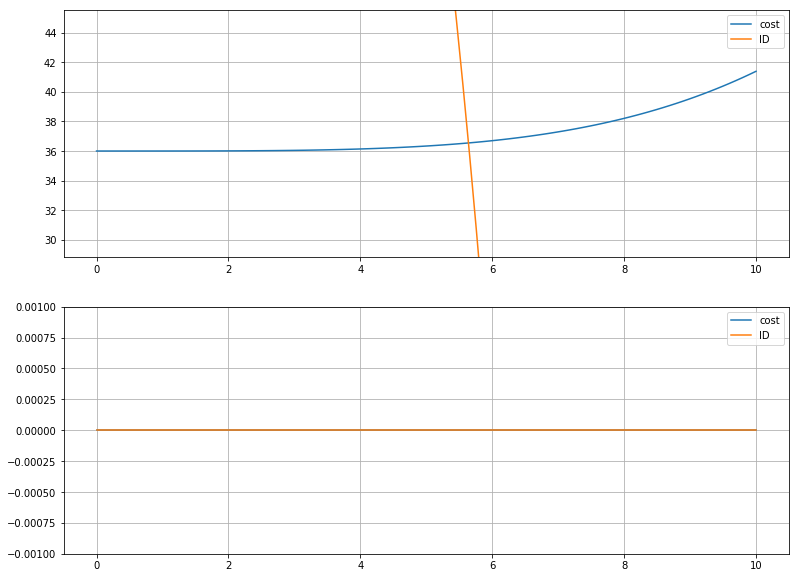

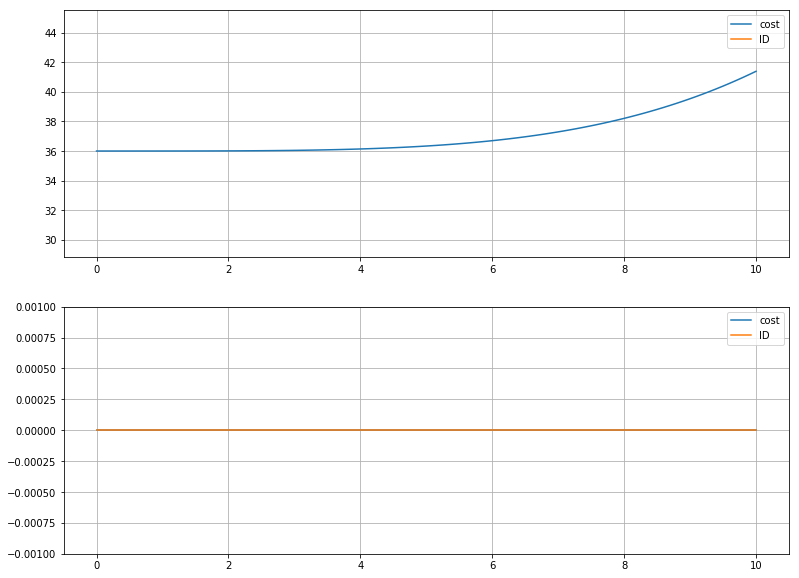

In [279]:
plot_cost_all_path(G_0, OD, '1', '1_p')

plot_cost_all_path(G_0, OD, '2', '2_p')

In [259]:
G_0.edges.data()


OutEdgeDataView([('1', '2', {'k': 10.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('1', 'R', {'k': 1.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('1', '2_p', {'k': 3.0, 'phi': 36.0, 'sign': -1.0, 'f_m': 0, 'f_r': 0, 'shift': 150.0, 'cost': 51.0}), ('1', '1_p', {'k': 1.0, 'phi': 0.0, 'sign': 1.0, 'f_m': 10, 'f_r': 0, 'shift': 0.0, 'cost': 165.0}), ('2', '1', {'k': 10.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('2', 'R', {'k': 1.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('2', '1_p', {'k': 3.0, 'phi': 36.0, 'sign': -1.0, 'f_m': 0, 'f_r': 0, 'shift': 150.0, 'cost': 51.0}), ('2', '2_p', {'k': 1.0, 'phi': 0.0, 'sign': 1.0, 'f_m': 10, 'f_r': 0, 'shift': 0.0, 'cost': 165.0})])

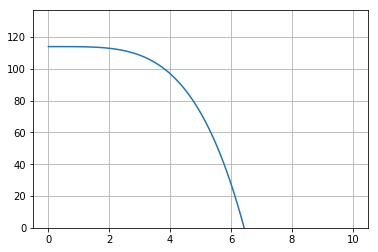

In [263]:
plot_inv_demand(10, 36, 3, 150)



# Scenario 2

In [353]:
path='Data/3Nodes/'

In [354]:
G_0, OD = construct_graph(path)

In [355]:
edge_list=get_edge_list(G_0)

## Solving with ICU

In [337]:
#How to compute a stopping criterion? 
G_icu,y_list,opt_res,OD_list=modified_FW(G_0.copy(),OD.copy(),edge_list,maxIter=10000,
                         step='fixed',rebalancer_smoothing=True, ri_smoothing=False,evolving_bounds=False)

In [342]:
len(G_icu)

10000

In [343]:
f=[]

for G_crt in G_icu:
    f.append(G_crt['2']['3']['f_m']+G_crt['2']['3']['f_r'])
    

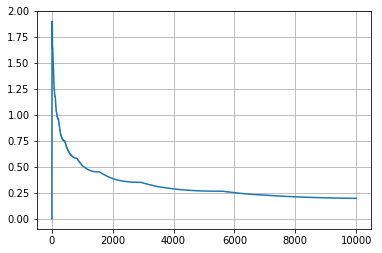

In [346]:
plt.plot(f)
plt.grid(True)

## Solving with Outer Loop

In [332]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, '3': 0, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 10, ('3', '3_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0, ('3', 'R'): 0}
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': 0.03849223406529845, '1_p': 0, '2': -0.02509312112632589, '2_p': 0, '3': -0.013399112938971669, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 10, ('3', '3_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0.02509312112632589, ('3', 'R'): 0.013399112938971669}
##########################################
ITERATION #:  3
CURRENT RI_k
{'1': 0.037892287842203665, '1_p': 0, '2': -0.013005443841284325, '2_p': 0, '3': -0.02488684400091934, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 10, ('3', '3_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0.013005443841284325, ('3', 'R'): 0.02488684400091934}
##########################################
ITERATION #:  4
CURRENT RI_

In [338]:
compare_final(G_icu,G_FW,'flow')

('1', '2')  :  0.53 %
('1', '3')  :  0.33 %
('1', 'R')  :  99.99 %
('1', '2_p')  :  0.04 %
('1', '3_p')  :  0.08 %
('1', '1_p')  :  0.35 %
('2', '1')  :  0.69 %
('2', '3')  :  inf %
('2', 'R')  :  0.0 %
('2', '1_p')  :  0.17 %
('2', '2_p')  :  0.05 %
('3', '1')  :  0.11 %
('3', '2')  :  inf %
('3', 'R')  :  0.0 %
('3', '1_p')  :  0.33 %
('3', '3_p')  :  0.12 %


In [339]:
compare_final(G_icu,G_FW,'cost')



('1', '2')  :  0.04 %
('1', '3')  :  0.02 %
('1', 'R')  :  13.04 %
('1', '2_p')  :  0.18 %
('1', '3_p')  :  0.13 %
('1', '1_p')  :  0.0 %
('2', '1')  :  0.05 %
('2', '3')  :  0.0 %
('2', 'R')  :  0.0 %
('2', '1_p')  :  0.31 %
('2', '2_p')  :  0.0 %
('3', '1')  :  0.01 %
('3', '2')  :  0.0 %
('3', 'R')  :  0.0 %
('3', '1_p')  :  0.69 %
('3', '3_p')  :  0.0 %


In [340]:
print_final_flows(G_icu)
print('---------------')
print_final_flows(G_FW)

('1', '2')  :  5.877501848388868
('1', '3')  :  5.838781689744779
('1', 'R')  :  2.7340832940272706e-06
('1', '2_p')  :  5.835170574465286
('1', '3_p')  :  5.838169497553527
('1', '1_p')  :  8.32477167834944
('2', '1')  :  5.886837623601109
('2', '3')  :  0.19746657321732786
('2', 'R')  :  0.0
('2', '1_p')  :  5.836446631905788
('2', '2_p')  :  4.164829425534757
('3', '1')  :  5.864273886268582
('3', '2')  :  0.06650794115810711
('3', 'R')  :  0.0
('3', '1_p')  :  5.838781689744779
('3', '3_p')  :  4.161830502446487
---------------
('1', '2')  :  5.846275308488913
('1', '3')  :  5.857969316671287
('1', 'R')  :  0.0378922878422037
('1', '2_p')  :  5.833082472670368
('1', '3_p')  :  5.833269864647629
('1', '1_p')  :  8.295755374839771
('2', '1')  :  5.846275308488913
('2', '3')  :  0.0
('2', 'R')  :  0.0
('2', '1_p')  :  5.846275308488913
('2', '2_p')  :  4.166917527329633
('3', '1')  :  5.857969316671287
('3', '2')  :  0.0
('3', 'R')  :  0.0
('3', '1_p')  :  5.857969316671287
('3', '3_p

In [336]:
print_final_cost(G_icu)
print('---------------')
print_final_cost(G_FW)

('1', '2')  :  36.64923042575018
('1', '3')  :  36.64071568708844
('1', 'R')  :  360.0000010489636
('1', '2_p')  :  128.76830724558806
('1', '3_p')  :  128.6088465858585
('1', '1_p')  :  165.0
('2', '1')  :  36.72958043423259
('2', '3')  :  36.00003806465182
('2', 'R')  :  10000000000000000000000
('2', '1_p')  :  128.84433850671368
('2', '2_p')  :  165.0
('3', '1')  :  36.70550941956656
('3', '2')  :  36.000000052715926
('3', 'R')  :  10000000000000000000000
('3', '1_p')  :  130.1007021096832
('3', '3_p')  :  165.0
---------------
('1', '2')  :  36.630827782135924
('1', '3')  :  36.635890197338625
('1', 'R')  :  414.0000000000002
('1', '2_p')  :  128.17936630807063
('1', '3_p')  :  128.18928455701047
('1', '1_p')  :  165.0
('2', '1')  :  36.630827782135924
('2', '3')  :  36.0
('2', 'R')  :  10000000000000000000000
('2', '1_p')  :  128.87997310320134
('2', '2_p')  :  165.0
('3', '1')  :  36.635890197338625
('3', '2')  :  36.0
('3', 'R')  :  10000000000000000000000
('3', '1_p')  :  129.5

In [255]:
from helpers_icu import plot_cost_all_path, plot_inv_demand

o, d 1 1_p
path:  ['1', '2', '3', '1_p']
o, d 1 1_p
path:  ['1', '2', '1_p']
o, d 1 1_p
path:  ['1', '3', '2', '1_p']
o, d 1 1_p
path:  ['1', '3', '1_p']
o, d 1 1_p
path:  ['1', '1_p']
o, d 2 2_p
path:  ['2', '1', '2_p']
o, d 2 2_p
path:  ['2', '3', '1', '2_p']
o, d 2 2_p
path:  ['2', '2_p']
o, d 3 3_p
path:  ['3', '1', '3_p']
o, d 3 3_p
path:  ['3', '2', '1', '3_p']
o, d 3 3_p
path:  ['3', '3_p']
------------------------------------------
o, d 1 1_p
path:  ['1', '2', '3', '1_p']
o, d 1 1_p
path:  ['1', '2', '1_p']
o, d 1 1_p
path:  ['1', '3', '2', '1_p']
o, d 1 1_p
path:  ['1', '3', '1_p']
o, d 1 1_p
path:  ['1', '1_p']
o, d 2 2_p
path:  ['2', '1', '2_p']
o, d 2 2_p
path:  ['2', '3', '1', '2_p']
o, d 2 2_p
path:  ['2', '2_p']
o, d 3 3_p
path:  ['3', '1', '3_p']
o, d 3 3_p
path:  ['3', '2', '1', '3_p']
o, d 3 3_p
path:  ['3', '3_p']
------------------------------------------
o, d 1 1_p
path:  ['1', '2', '3', '1_p']
o, d 1 1_p
path:  ['1', '2', '1_p']
o, d 1 1_p
path:  ['1', '3', '2', '

/Users/lucasfuentes/ASL/ICU/notebooks/helpers_icu.py:340: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  


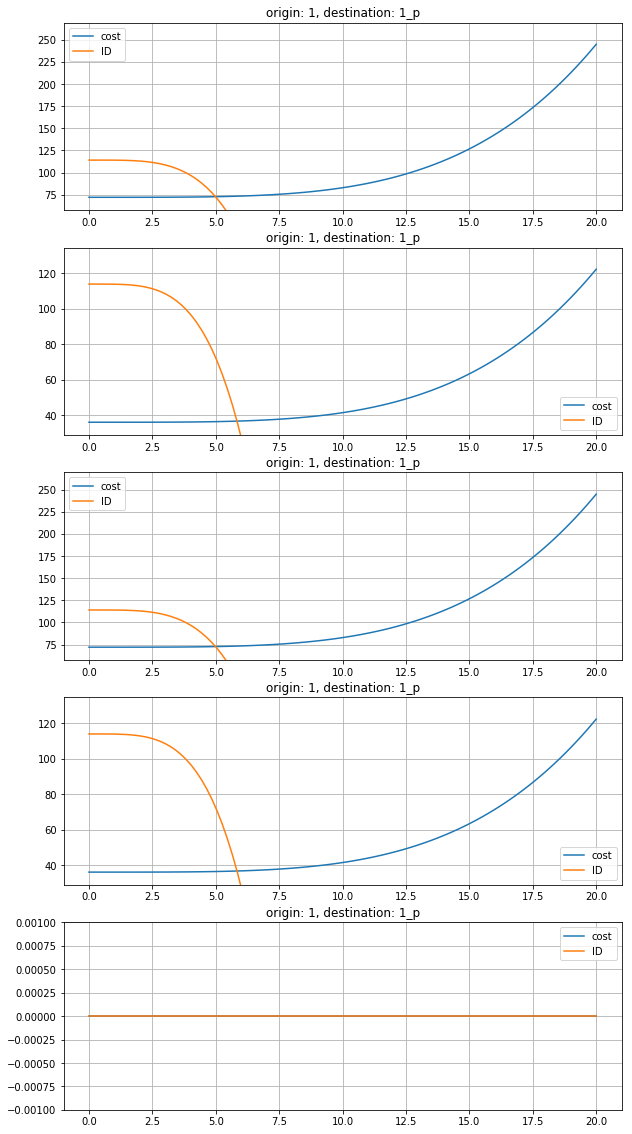

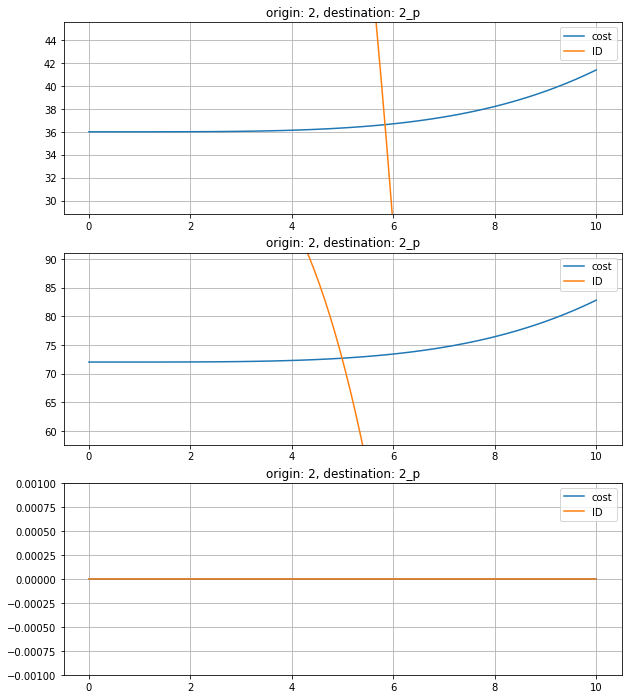

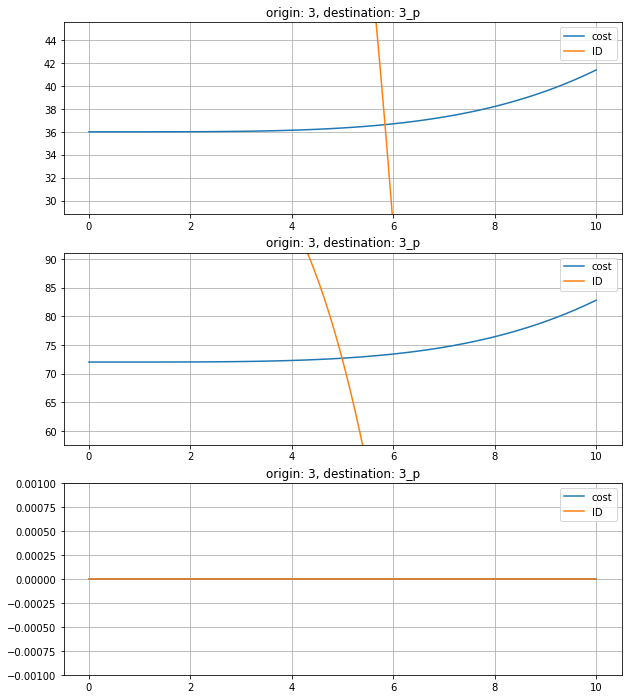

In [347]:
plot_cost_all_path(G_0, OD, '1', '1_p')
print("------------------------------------------")
plot_cost_all_path(G_0, OD, '2', '2_p')
print("------------------------------------------")
plot_cost_all_path(G_0, OD, '3', '3_p')

# Scenario 3

In [362]:
path='Data/3Nodes_ex2/'

In [363]:
G_0, OD = construct_graph(path)

In [364]:
edge_list=get_edge_list(G_0)

## Solving with ICU

In [378]:
#How to compute a stopping criterion? 
G_icu,y_list,opt_res,OD_list=modified_FW(G_0.copy(),OD.copy(),edge_list,maxIter=20000,
                         step='fixed',rebalancer_smoothing=True, ri_smoothing=False,evolving_bounds=False)

## Solving with Outer Loop

In [369]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4, max_iter=3000)


##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, '3': 0, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 20, ('3', '3_p'): 20, ('1', 'R'): 0, ('2', 'R'): 0, ('3', 'R'): 0}
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': -7.025470238979773, '1_p': 0, '2': -0.2565952856301337, '2_p': 0, '3': 7.282065524609907, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 20, ('3', '3_p'): 20, ('1', 'R'): 7.025470238979773, ('2', 'R'): 0.2565952856301337, ('3', 'R'): 0}
##########################################
ITERATION #:  3
CURRENT RI_k
{'1': -7.024325690164742, '1_p': 0, '2': -0.24100382248287477, '2_p': 0, '3': 7.265329512647617, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 20, ('3', '3_p'): 20, ('1', 'R'): 7.024325690164742, ('2', 'R'): 0.24100382248287477, ('3', 'R'): 0}
##########################################
ITERATION #:  4
CURRENT RI_k
{'1': -7.02367066

In [379]:
compare_final(G_icu,G_FW,'flow')



('1', '2')  :  64.93 %
('1', '3')  :  24.91 %
('1', 'R')  :  0.0 %
('1', '2_p')  :  0.14 %
('1', '3_p')  :  0.08 %
('1', '1_p')  :  11.78 %
('2', '1')  :  0.14 %
('2', '3')  :  12.88 %
('2', 'R')  :  inf %
('2', '1_p')  :  35.16 %
('2', '3_p')  :  0.08 %
('2', '2_p')  :  0.2 %
('3', '1')  :  0.08 %
('3', '2')  :  0.08 %
('3', 'R')  :  20.75 %
('3', '1_p')  :  0.0 %
('3', '2_p')  :  0.28 %
('3', '3_p')  :  0.01 %


In [371]:
compare_final(G_icu,G_FW,'cost')



('1', '2')  :  84.75 %
('1', '3')  :  18.94 %
('1', 'R')  :  0.0 %
('1', '2_p')  :  0.2 %
('1', '3_p')  :  0.22 %
('1', '1_p')  :  0.0 %
('2', '1')  :  0.01 %
('2', '3')  :  0.48 %
('2', 'R')  :  100.0 %
('2', '1_p')  :  19.5 %
('2', '3_p')  :  0.1 %
('2', '2_p')  :  0.0 %
('3', '1')  :  0.01 %
('3', '2')  :  0.0 %
('3', 'R')  :  14.5 %
('3', '1_p')  :  0.0 %
('3', '2_p')  :  0.17 %
('3', '3_p')  :  0.0 %


In [372]:
print_final_flows(G_icu)
print('---------------')
print_final_flows(G_FW)

('1', '2')  :  8.279885688901004
('1', '3')  :  8.77361674719841
('1', 'R')  :  0.0
('1', '2_p')  :  5.418252838038224
('1', '3_p')  :  6.60513153191202
('1', '1_p')  :  16.74322290970167
('2', '1')  :  5.418252838038224
('2', '3')  :  5.3821929098222805
('2', 'R')  :  2.168087239608447
('2', '1_p')  :  3.256777090298245
('2', '3_p')  :  5.184454377733978
('2', '2_p')  :  10.06746036473587
('3', '1')  :  6.60513153191202
('3', '2')  :  5.184454377733978
('3', 'R')  :  8.773539882271631
('3', '1_p')  :  0.0
('3', '2_p')  :  4.514286797226002
('3', '3_p')  :  8.210414090354043
---------------
('1', '2')  :  5.018446102549481
('1', '3')  :  7.0236706693433995
('1', 'R')  :  0.0
('1', '2_p')  :  5.429111363879898
('1', '3_p')  :  6.613005408013011
('1', '1_p')  :  14.981553897450498
('2', '1')  :  5.429111363879898
('2', '3')  :  4.762709279483707
('2', 'R')  :  0.0
('2', '1_p')  :  5.018446102549481
('2', '3_p')  :  5.173374540814124
('2', '2_p')  :  10.050099872730463
('3', '1')  :  6.61

In [373]:
print_final_cost(G_icu)
print('---------------')
print_final_cost(G_FW)

('1', '2')  :  76.63352107713328
('1', '3')  :  49.32650410980052
('1', 'R')  :  10000000000000000000000
('1', '2_p')  :  183.54938417512204
('1', '3_p')  :  183.09530091727845
('1', '1_p')  :  220.0
('2', '1')  :  36.466150011818485
('2', '3')  :  36.451055471288925
('2', 'R')  :  600.8442692381363
('2', '1_p')  :  143.51200294501564
('2', '3_p')  :  183.9439389817581
('2', '2_p')  :  220.0
('3', '1')  :  37.02947193742995
('3', '2')  :  36.02427161910951
('3', 'R')  :  474.0236380901848
('3', '1_p')  :  196.0
('3', '2_p')  :  183.53464886392115
('3', '3_p')  :  220.0
---------------
('1', '2')  :  41.48012922385833
('1', '3')  :  41.473412242922755
('1', 'R')  :  10000000000000000000000
('1', '2_p')  :  183.91935829571403
('1', '3_p')  :  183.4982583884865
('1', '1_p')  :  220.0
('2', '1')  :  36.46914680219528
('2', '3')  :  36.27784977538458
('2', 'R')  :  10000000000000000000000
('2', '1_p')  :  178.28494771495622
('2', '3_p')  :  183.75341413465728
('2', '2_p')  :  220.0
('3', '1

In [374]:
from helpers_icu import plot_cost_all_path, plot_inv_demand



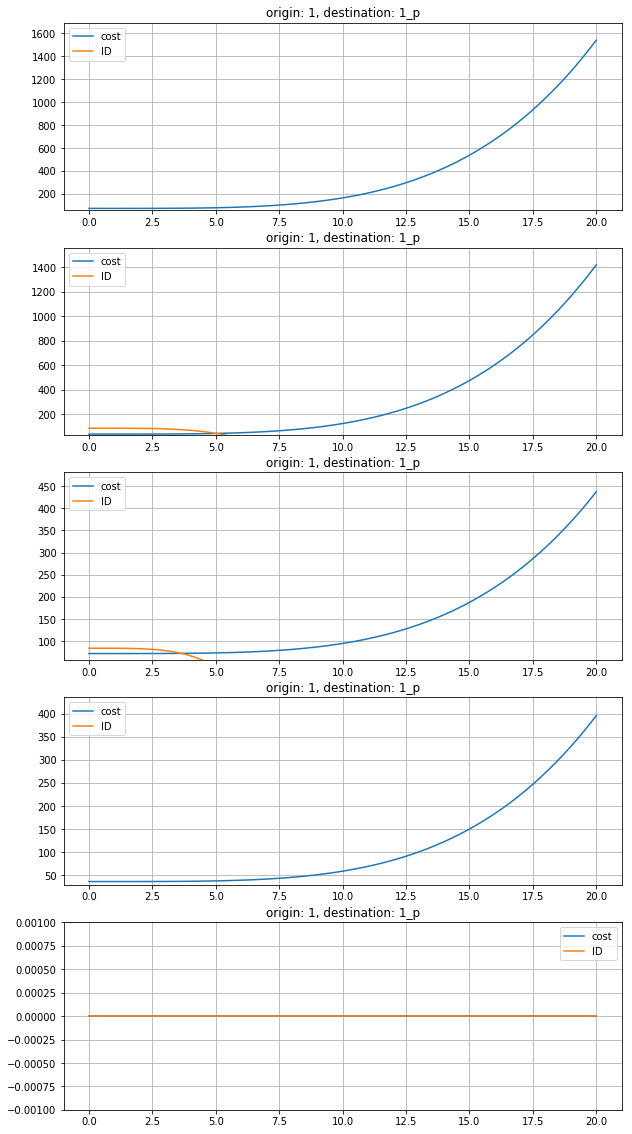

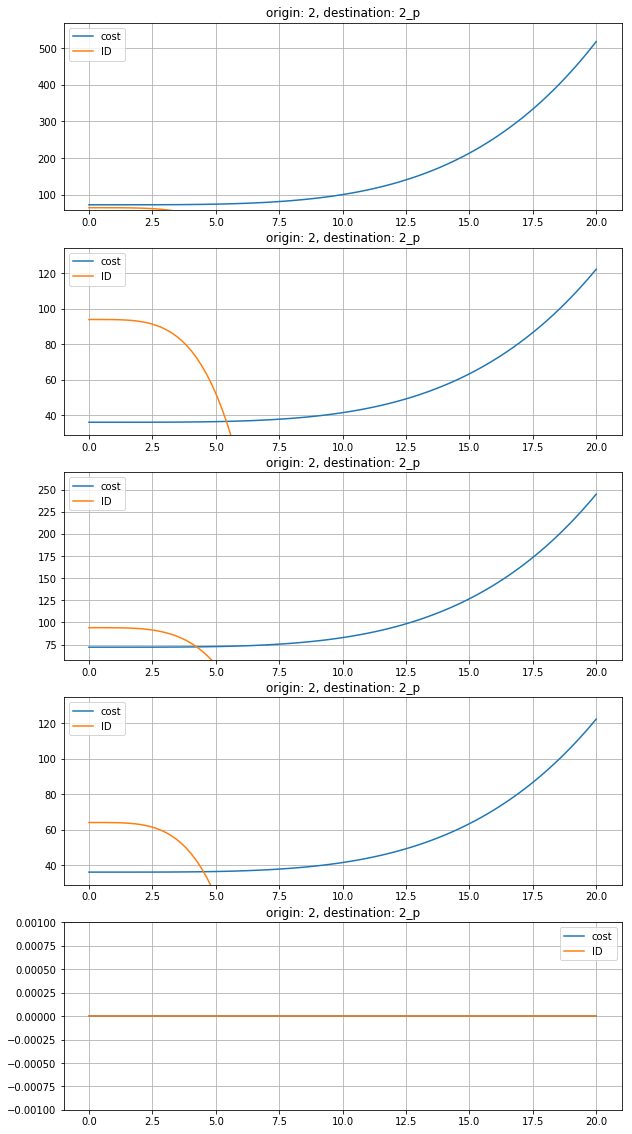

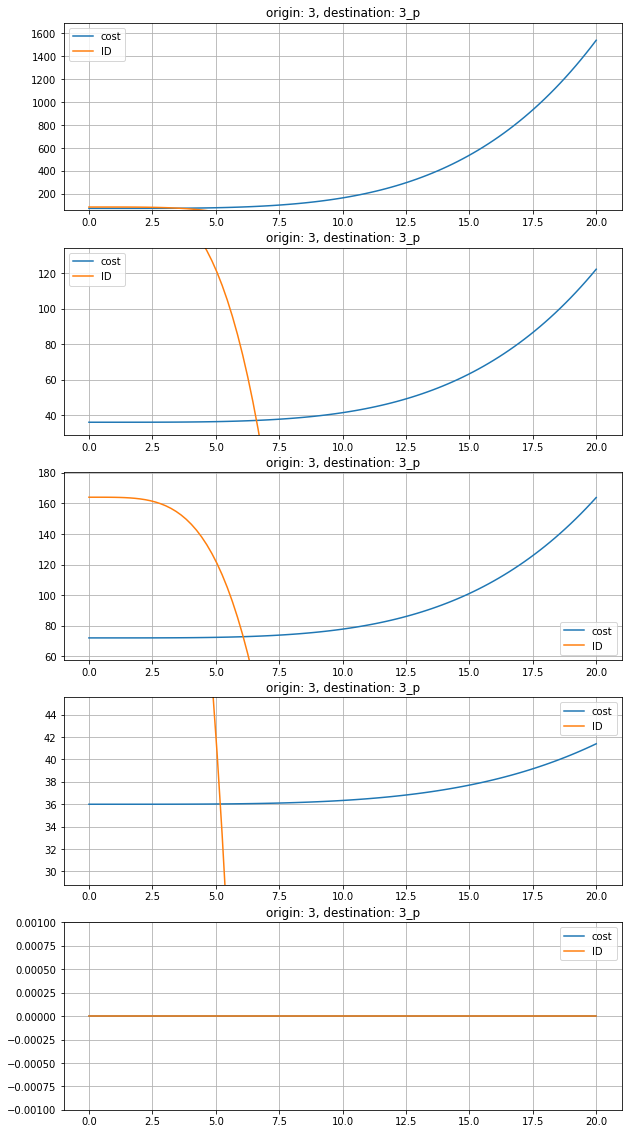

In [377]:
plot_cost_all_path(G_0, OD, '1', '1_p')
plot_cost_all_path(G_0, OD, '2', '2_p')
plot_cost_all_path(G_0, OD, '3', '3_p')